In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import measure
from scipy.fftpack import fft2, ifft2, ifftshift


# Section 1

In [ ]:
def deconvolution_wiener(src: np.ndarray, psf: np.ndarray, K: np.float64) -> np.ndarray:
  #deconvoled = np.zeros_like(src)
  
  # ref = https://github.com/tranleanh/wiener-filter-image-restoration/blob/master/Wiener%20Filter.ipynb
  
  # ...
  
  psf = np.complex_(psf)
  psf /= np.sum(psf)
  deconvoled = np.copy(src)
  
  # calculate DFT of the degraded image
  deconvoled = fft2(deconvoled)
  
  # calculate DFT of the point spread function
  psf = fft2(psf, shape= src.shape)
  
  # calculate the remaining steps to obtain original image w.r.t
  #(F_hat formula for wiener filter explained in the lecture slides)
  psf = np.conj(psf) / (np.abs(psf) ** 2 + K)
  deconvoled = deconvoled * psf
  deconvoled = np.abs(ifft2(deconvoled))
  
  
  return deconvoled

Load and test the image

In [ ]:
img_1 = cv2.imread("HW_7_2_1.jpg", cv2.IMREAD_GRAYSCALE)
psf_1  = cv2.imread("HW_7_2_psf_1.jpg", cv2.IMREAD_GRAYSCALE)


In [ ]:
deblurred_img = deconvolution_wiener(img_1, psf_1, K=0)

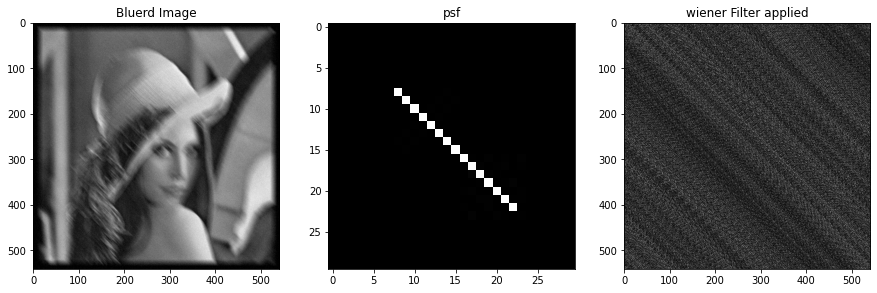

In [ ]:
display = [img_1, psf_1, deblurred_img]
label = ['Bluerd Image', 'psf', 'wiener Filter applied']
fig = plt.figure(figsize=(15, 10))
for i in range(len(display)):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

#Section 2

Meterics:

In [ ]:
def ssim(image_1: np.ndarray, image2: np.ndarray):
  pass

In [ ]:
img_base = cv2.imread("HW_7_2_base.jpg", cv2.IMREAD_GRAYSCALE)


Now try multiple K and compare them to the original image

In [ ]:
deblurred_img = deconvolution_wiener(img_1, psf_1, K=0.05)

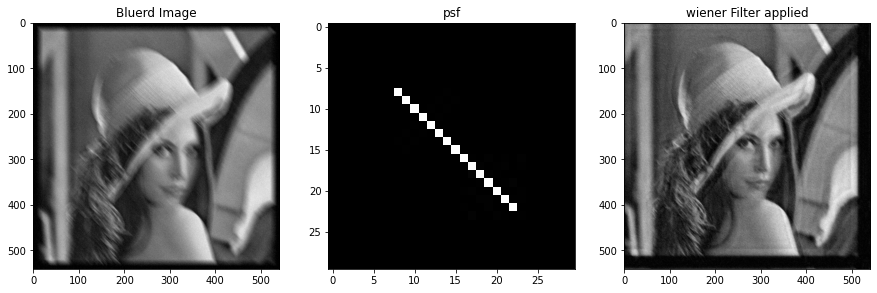

In [ ]:
display = [img_1, psf_1, deblurred_img]
label = ['Bluerd Image', 'psf', 'wiener Filter applied']
fig = plt.figure(figsize=(15, 10))
for i in range(len(display)):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

In [ ]:
deblurred_img = deconvolution_wiener(img_1, psf_1, K=0.005)

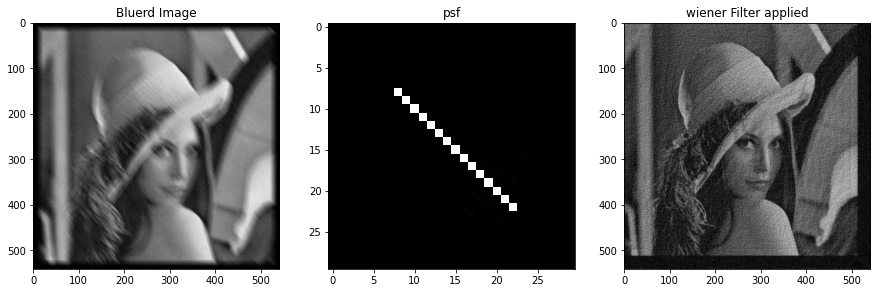

In [ ]:
display = [img_1, psf_1, deblurred_img]
label = ['Bluerd Image', 'psf', 'wiener Filter applied']
fig = plt.figure(figsize=(15, 10))
for i in range(len(display)):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

In [ ]:
deblurred_img = deconvolution_wiener(img_1, psf_1, K=0.0005)

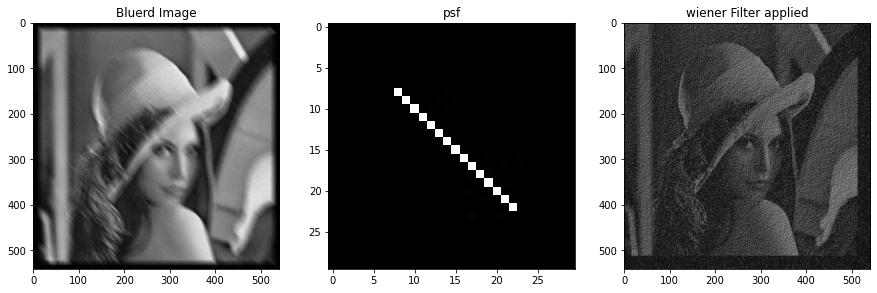

In [ ]:
display = [img_1, psf_1, deblurred_img]
label = ['Bluerd Image', 'psf', 'wiener Filter applied']
fig = plt.figure(figsize=(15, 10))
for i in range(len(display)):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Section 3 (Bonus)